In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

import matplotlib.pyplot as plt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Load the IMDB dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [5]:
# Pad sequences to ensure uniform length
max_length = 500  # Maximum length of reviews
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [6]:
# Verify the shape of the data
print(x_train.shape, y_train.shape)

(25000, 500) (25000,)


In [7]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length)) # Embedding layer to convert integer-encoded words to vectors
model.add(GlobalAveragePooling1D()) # Global average pooling to reduce sequence length
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

C:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - accuracy: 0.5116 - loss: 0.6917 - val_accuracy: 0.5560 - val_loss: 0.6781
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.5853 - loss: 0.6698 - val_accuracy: 0.5868 - val_loss: 0.6420
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.6529 - loss: 0.6118 - val_accuracy: 0.7572 - val_loss: 0.5269
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - accuracy: 0.7702 - loss: 0.5095 - val_accuracy: 0.6964 - val_loss: 0.5277
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.7998 - loss: 0.4450 - val_accuracy: 0.7242 - val_loss: 0.5076
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.8112 - loss: 0.4094 - val_accuracy: 0.7810 - val_loss: 0.4311
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.8346 - loss: 0.3722 - val_accuracy: 0.8340 - val_loss: 0.3742
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.8594 - loss: 0.3347 - val_accuracy: 

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8741 - loss: 0.3176
Test Accuracy: 0.8743


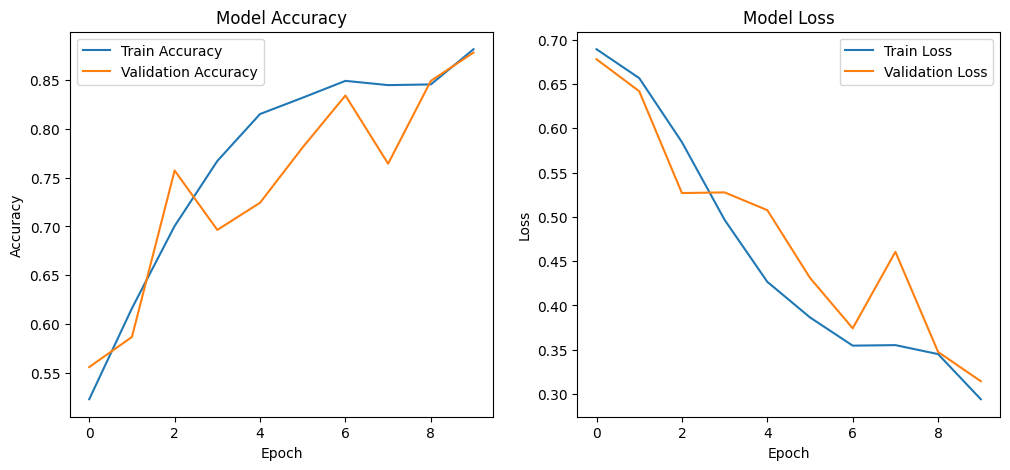

In [11]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [12]:
# Show sample predictions
y_pred_probs = model.predict(x_test[:10])
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [13]:
print(f"{'Review':<10} {'Predicted':<15} {'Actual':<15}")
print("-" * 40)
for i in range(10):
    pred = 'Positive' if y_pred_classes[i][0] == 1 else 'Negative'
    actual = 'Positive' if y_test[i] == 1 else 'Negative'
    print(f"{i+1:<10} {pred:<15} {actual:<15}")


Review     Predicted       Actual         
----------------------------------------
1          Negative        Negative       
2          Positive        Positive       
3          Positive        Positive       
4          Negative        Negative       
5          Positive        Positive       
6          Negative        Positive       
7          Positive        Positive       
8          Negative        Negative       
9          Positive        Negative       
10         Positive        Positive       
